In [2]:
# !unzip /content/drive/MyDrive/Rice.zip

In [1]:
#Khai bao thu vien
from sklearn.preprocessing import LabelEncoder
from keras.optimizers import Adam
from keras.utils import np_utils
from keras.layers.core import Dropout
from imutils import paths
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Flatten
from google.colab.patches import cv2_imshow
from keras.models import load_model
import matplotlib.pyplot as plt
import numpy as np
import pickle
import cv2
import os

In [2]:
#Model_DenseNet121
from tensorflow.keras.applications import DenseNet121
baseModel = DenseNet121(weights="imagenet", include_top=False, input_tensor=Input(shape=(64, 64, 3)))
headModel = baseModel.output
headModel = AveragePooling2D(pool_size=(2,2))(headModel)
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(1024, activation="relu")(headModel)
headModel = Dropout(0.5)(headModel)
headModel = Dense(1024, activation="relu")(headModel)
headModel = Dropout(0.5)(headModel)
headModel = Dense(3, activation="softmax")(headModel)
model = Model(inputs=baseModel.input, outputs=headModel)
print(model.summary())

29089792/29084464 [==============================] - 1s 0us/step
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 64, 64, 3)]  0                                            
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, 70, 70, 3)    0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 32, 32, 64)   9408        zero_padding2d[0][0]             
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 32, 32, 64)   256         conv1/conv[0][0]                 
_____________________________

In [3]:
#Model VGG16
# from tensorflow.keras.applications import VGG16
# baseModel = VGG16(weights="imagenet", include_top=False, input_tensor=Input(shape=(64, 64, 3)))
# headModel = baseModel.output
# headModel = AveragePooling2D(pool_size=(2,2))(headModel)
# headModel = Flatten(name="flatten")(headModel)
# headModel = Dense(1024, activation="relu")(headModel)
# headModel = Dropout(0.5)(headModel)
# headModel = Dense(1024, activation="relu")(headModel)
# headModel = Dropout(0.5)(headModel)
# headModel = Dense(3, activation="softmax")(headModel)
# model = Model(inputs=baseModel.input, outputs=headModel)
# print(model.summary())

In [4]:
# #Model MobileNet
# from tensorflow.keras.applications import MobileNet
# baseModel = MobileNet(weights="imagenet", include_top=False, input_tensor=Input(shape=(64, 64, 3)))
# headModel = baseModel.output
# headModel = AveragePooling2D(pool_size=(2,2))(headModel)
# headModel = Flatten(name="flatten")(headModel)
# headModel = Dense(1024, activation="relu")(headModel)
# headModel = Dropout(0.5)(headModel)
# headModel = Dense(1024, activation="relu")(headModel)
# headModel = Dropout(0.5)(headModel)
# headModel = Dense(3, activation="softmax")(headModel)
# model = Model(inputs=baseModel.input, outputs=headModel)
# print(model.summary())

In [5]:
# #Model Inception
# from tensorflow.keras.applications import InceptionV3
# baseModel = InceptionV3(weights="imagenet", include_top=False, input_tensor=Input(shape=(76, 76, 3)))
# headModel = baseModel.output
# headModel = AveragePooling2D(pool_size=(1,1))(headModel)
# headModel = Flatten(name="flatten")(headModel)
# headModel = Dense(1024, activation="relu")(headModel)
# headModel = Dropout(0.5)(headModel)
# headModel = Dense(1024, activation="relu")(headModel)
# headModel = Dropout(0.5)(headModel)
# headModel = Dense(3, activation="softmax")(headModel)
# model = Model(inputs=baseModel.input, outputs=headModel)
# print(model.summary())

In [6]:
#thiet lap thong so lr, batch_size va epochs
INIT_LR = 1e-4
BS = 8
EPOCHS = 20

In [40]:
#khoi tao input
imagePaths = list(paths.list_images('/content/Rot_Img/train'))
data = []
labels = []

for imagePath in imagePaths:
    label = imagePath.split(os.path.sep)[-2]
    image = cv2.imread(imagePath)
    image = cv2.resize(image, (64, 64))
    # cv2_imshow(image)
    data.append(image)
    labels.append(label)
data = np.array(data, dtype="float") / 255.0

In [41]:
#one-hot label
le = LabelEncoder()
labels = le.fit_transform(labels)
labels = np_utils.to_categorical(labels, 3)

In [42]:
#set du lieu train
X_train = data
y_train = labels

In [43]:
# print(y_train)

In [44]:
#compile + train
opt = Adam(learning_rate=INIT_LR, decay=INIT_LR / EPOCHS)
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])
H = model.fit(X_train, y_train, batch_size=BS, steps_per_epoch=len(X_train) // BS, epochs=EPOCHS)

Epoch 1/20
313/313 [==============================] - 38s 91ms/step - loss: 0.8333 - accuracy: 0.6102
Epoch 2/20
313/313 [==============================] - 30s 91ms/step - loss: 0.6059 - accuracy: 0.7419
Epoch 3/20
313/313 [==============================] - 29s 92ms/step - loss: 0.4754 - accuracy: 0.8126
Epoch 4/20
313/313 [==============================] - 29s 91ms/step - loss: 0.4067 - accuracy: 0.8478
Epoch 5/20
313/313 [==============================] - 29s 91ms/step - loss: 0.3705 - accuracy: 0.8542
Epoch 6/20
313/313 [==============================] - 29s 91ms/step - loss: 0.3005 - accuracy: 0.8889
Epoch 7/20
313/313 [==============================] - 29s 92ms/step - loss: 0.2998 - accuracy: 0.8957
Epoch 8/20
313/313 [==============================] - 29s 92ms/step - loss: 0.2725 - accuracy: 0.9077
Epoch 9/20
313/313 [==============================] - 29s 92ms/step - loss: 0.2504 - accuracy: 0.9061
Epoch 10/20
313/313 [==============================] - 29s 92ms/step - loss: 0.231

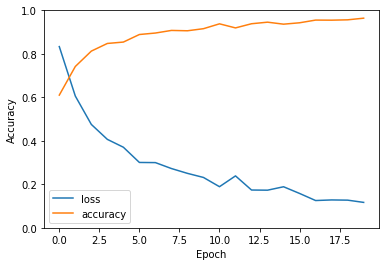

In [45]:
#do thi train
import matplotlib.pyplot as plt

plt.plot(np.arange(0, EPOCHS), H.history['loss'], label='loss')
plt.plot(np.arange(0, EPOCHS), H.history['accuracy'], label = 'accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend()
plt.show()

In [46]:
#save model
model.save('XLA_DenseNet121.h5')

In [48]:
#Khoi tao du lieu test
imagePaths_test = list(paths.list_images('/content/Rot_Img/test'))
data_test = []
labels_test = []
for path_test in imagePaths_test:
    label2 = path_test.split(os.path.sep)[-2]
    image2 = cv2.imread(path_test)
    image2 = cv2.resize(image2, (64,64))
    data_test.append(image2)
    labels_test.append(label2)
data_test = np.array(data_test, dtype="float") / 255.0

#one-hot label
le_test = LabelEncoder()
labels_test = le_test.fit_transform(labels_test)
labels_test = np_utils.to_categorical(labels_test, 3)

In [49]:
#set du lieu test
X_test = data_test
y_test = labels_test


In [51]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

In [53]:
#so sanh test + train
print("So sanh train")
print(np.argmax(y_train[0:500], axis=-1))
print(np.argmax(y_pred_train[0:500], axis=-1))
print("So sanh test")
print(np.argmax(y_test, axis=-1))
print(np.argmax(y_pred_test, axis=-1))

So sanh test
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2

In [55]:
score_train = model.evaluate(X_train, y_train)
print('Score train = ', score_train)
score_test = model.evaluate(X_test, y_test)
print('Score test = ', score_test)

79/79 [==============================] - 5s 47ms/step - loss: 0.2396 - accuracy: 0.9626
[0.23960627615451813, 0.9625647068023682]


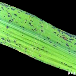

[[1.1949561e-09 1.3914856e-04 9.9986088e-01]]
[2]


In [59]:
# model = load_model('/content/XLA_InceptionV3.h5')
img = cv2.imread('/content/drive/MyDrive/ls4.png')
img = cv2.resize(img,(76, 76))
cv2_imshow(img)
img = img.reshape(1,64,64,3)
data_leaf = np.array(img, dtype = 'float') /255.0
one = model.predict(data_leaf)
print(one)
print(np.argmax(one, axis = -1))

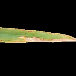

[[0.23482509 0.11144258 0.6537323 ]]
[2]


In [61]:
img1 = cv2.imread('/content/drive/MyDrive/Ba1.jpg')
img1 = cv2.resize(img1,(64,64))
cv2_imshow(img1)
img1 = img1.reshape(1,64,64,3)
data_leaf1 = np.array(img1, dtype = 'float') /255.0
one1 = model.predict(data_leaf1)
print(one1)
print(np.argmax(one1, axis = -1))

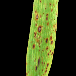

[[1.6374917e-04 1.0535839e-03 9.9878269e-01]]
[2]


In [63]:
img2 = cv2.imread('/content/drive/MyDrive/br5.png')
img2 = cv2.resize(img2,(64,64))
cv2_imshow(img2)
img2 = img2.reshape(1,64,64,3)
data_leaf2 = np.array(img2, dtype = 'float') /255.0
one2 = model.predict(data_leaf2)
print(one2)
print(np.argmax(one2, axis = -1))